#### Background

Twitter, which has more than 300 million monthly users, is rapidly being utilized to communicate public health information and acquire real-time health data using crowdsourcing approaches. The spread of influenza and other contagious diseases was projected in real time using Twitter data, according to the researchers. We believe that analysing the material and feelings stated on Twitter over time during the early phases of the pandemic can help us better understand how the outbreak affected people's emotions, beliefs, and opinions. Such an understanding would allow for large-scale educational opportunities and proper information dissemination concerning public health guidelines and public sentiment throughout time.

#### Introduction

The increasing usage of social media platforms like Twitter has sped up the process of exchanging information and expressing opinions regarding public events and health issues. Since January 2020, COVID-19 has been one of the most talked-about subjects on Twitter, and it hasn't stopped. People have been increasingly depending on various social media platforms to acquire news and voice opinions since quarantine measures were enforced throughout most nations (for example, the shelter-in-place order in the United States). Data from Twitter is useful for exposing public debates and attitudes on a variety of issues.

To track the spread of Covid using Tweets of people tweeting their symptoms, we have mainly focused on the new variant of covid i.e omicron and extracted tweets related to omicron and symptoms associated with it from 26th November 2021. The reason we wanted to focus on it was because of the less amount of work done on the new variant.

So, we tried to track those people who are vaccinated and talk about symptoms and omicrons. Further we have to find who is vaccinated and who isn’t. 

1. Track no of tweets
2. On the basis of sentiment scores and other features, we can cluster if a person will be vaccinated or not on the basis of their tweet.

#### Literature Survey:

1.The paper , ‘The effect of pre-processing techniques on Twitter Sentiment Analysis’ written by Akrivi Krouska, Christos Troussas, Maria Virvou talks about how data pre-processing is a crucial step in sentiment analysis, since selecting the appropriate pre-processing methods, the correctly classified instances can be increased. This research paper explains the necessary information to pre-process the reviews in order to find sentiment and make analysis whether it is positive or negative. Extended comparison of sentiment polarity classification methods for Twitter text and the role of text pre-processing in sentiment analysis are discussed in depth. Finally, it is proved that feature selection and representation can affect the classification performance positively.

2.Irvin Dongo, Yudith Cadinale, Fabiola Martínez and Yuni Quintero in their paper ‘Web Scraping versus Twitter API: A Comparison for a Credibility Analysis’ discusses about advantages and disadvantages of Twitter API or web scraping to extract the data to perform analysis. Results report that both methods produce identical credibility values, when a robust normalization process is applied to the text (i.e., tweet). Moreover, concerning the time performance, web scraping is faster than Twitter API, and it is more flexible in terms of obtaining data; however, web scraping is very sensitive to website changes.

3.In the paper ‘Sentiment Analysis with NLP on Twitter Data’, Md. Rakibul Hasan, Maisha Maliha and M. Arifuzzaman use twitter data to analyze public views towards a product. This is an initiative to use BoW and TF-IDF are used together to precisely classify positive and negative tweets. They have found that by exploiting TF-IDF vectorizer, the accuracy of sentiment analysis can be substantially improved and simulation results show the efficiency of our proposed system. They achieved 85.25% accuracy in sentiment analysis using NLP technique.

4.Long Ma and Yanqing Zhang in their paper Using Word2Vec to Process Big Text Data expresses how Word2Vec can be implemented for huge text data. Word2Vec, proposed and supported by Google, is not an individual algorithm, but it consists of two learning models, Continuous Bag of Words (CBOW) and Skip-gram. By feeding text data into one of the learning models, Word2Vec outputs words. In their work, they first trained the data via Word2Vec model and evaluated the word similarity. In addition, they clustered the similar words together and used the generated clusters to fit into a new data dimension so that the data dimension is decreased.
 
5.In the study 'Twitter Sentiment Analysis on Worldwide COVID-19 Outbreaks’ by Kamaran H. Manguri, Rebaz N. Ramadhan and Pshko R. Mohammed Amin, the twitter data has been pulled out from Twitter social media, using Tweepy in Python , then by using TextBlob library in python the sentiment analysis operation has been done. The data collected on twitter are based on two specified hashtag keywords, which are (“COVID-19, coronavirus”). In the end a visualized presentation regarding the results and further explanation has been provided by them.

#### Aim:

We have tried to track tweets related to symptoms with the onset of the new variant, and if we can classify people who tweeted those tweets are vaccinated or not.

#### Data Extraction:

There are a few ways to collect tweets from Twitter. We can use the Twitter API but the Twitter API limits the number of tweets we can collect, so we looked upon other methods. We can manually scrape the tweets we want but this can be time-consuming. Another option is to use Twint. Twint is a tool that allows us to scrape Tweets off of Twitter that fit inputted requirements. Twint allows us to search and scrape tweets that contain certain words or phrases, tweets published by specific accounts, tweets within a certain time frame, and much more. The code begins with configuring the search requirements and ends with the command to run the Twint search. The code will return the tweets that contain the term “omicron” and "symptom". If we use only the omicron keyword, we can get more than 5000 tweets in a day, but these will be very general and won't talk exactly if people have gotten any symptoms, so we included symptoms in our keyword. The “Until” keyword is used to return tweets published before that date, while the “since” keyword returns tweets published after that date. Each instance of a tweet begins with the tweet id, the date the tweet was published, the time the tweet was published, the username the tweet came from, and then the actually written tweet. Here, we can save our tweets to a CSV file. While it’s pretty powerful, one major limitation is that while it gives the count of times something has been liked or retweeted, it does not return who liked or retweeted it.

Similarly, we can define keywords, hashtags, date range, language to define the scope of the search. This gave us approx 2100 tweets. 
Further, we can schedule Twint to run periodically — every day or week and update a database using ElasticSearch. Then, we can add an analytical layer and visualize using Kibana and monitor results.


# Install and import libraries

In [63]:
# !pip install unidecode
# !pip install neattext
# !pip install autocorrect

In [64]:
# !pip install gensim

In [6]:
import os
import matplotlib.pyplot as plt
import neattext as ntx
import textblob
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode

import nltk
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

from sklearn.cluster import KMeans
from time import time 
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer
import sklearn.preprocessing as pre
import sklearn.model_selection as ms
import sklearn.linear_model as glm
import sklearn.metrics as mt

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

# Scraping data from twitter

In [ ]:
# searchstr = ["omicron", "symptom"]  # keywords

# c = twint.Config()
# c.Limit = 50
# c.Lang = "en"
# c.Store_csv = True
# c.Search = searchstr
# c.Pandas = True

# c.Until = '2021-12-22'
# c.Since = '2021-11-01'

# # c.Min_likes = 20

# c.Output = "en_omicron+symptom_final.csv"
# twint.run.Search(c)


This involved multiple scraping runs for each day interval for better results.

# Import Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path= "/content/drive/MyDrive/Twitter project/en_omicron+symptom_final.csv"
# with open(path) as f:
#     print(f)

<_io.TextIOWrapper name='/content/drive/MyDrive/Twitter project/en_omicron+symptom_final.csv' mode='r' encoding='UTF-8'>


In [7]:
file = pd.read_csv("en_omicron+symptom_final.csv", encoding = "unicode_escape", engine='python')

# Understanding Data

In [8]:
file.head()

id  conversation_id               created_at        date  \
0  1.470000e+18     1.470000e+18  2021-12-20 07:14:23 UTC  12/20/2021   
1  1.470000e+18     1.470000e+18  2021-12-20 07:09:04 UTC  12/20/2021   
2  1.470000e+18     1.470000e+18  2021-12-20 07:03:17 UTC  12/20/2021   
3  1.470000e+18     1.470000e+18  2021-12-20 07:01:05 UTC  12/20/2021   
4  1.470000e+18     1.470000e+18  2021-12-20 06:47:18 UTC  12/20/2021   

      time  timezone       user_id         username            name  place  \
0  7:14:23         0  7.120000e+17    james_youdale   James Youdale    NaN   
1  7:09:04         0  1.333125e+09  sepfieldpatient              Jo    NaN   
2  7:03:17         0  7.390000e+17        chriscmma  Chris ð¬ð§    NaN   
3  7:01:05         0  7.238310e+07          jmad263         JOSEPH.    NaN   
4  6:47:18         0  1.420000e+18      thraxus2021     Thraxus2021    NaN   

   ... geo source user_rt_id user_rt retweet_id  \
0  ... NaN    NaN        NaN     NaN        NaN   
1  ... NaN    NaN        NaN     NaN        NaN   
2  ... NaN    NaN        NaN     NaN        NaN   
3  ... NaN    NaN        NaN     NaN        NaN   
4  ... NaN    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0                                                 []           NaN        NaN   
1  [{'screen_name': 'AndrewHewat', 'name': 'Andre...           NaN        NaN   
2                                                 []           NaN        NaN   
3                                                 []           NaN        NaN   
4  [{'screen_name': 'lakefieldmoscow', 'name': 'g...           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2100 non-null   float64
 1   conversation_id  2100 non-null   float64
 2   created_at       2100 non-null   object 
 3   date             2100 non-null   object 
 4   time             2100 non-null   object 
 5   timezone         2100 non-null   int64  
 6   user_id          2100 non-null   float64
 7   username         2100 non-null   object 
 8   name             2100 non-null   object 
 9   place            0 non-null      float64
 10  tweet            2100 non-null   object 
 11  language         2100 non-null   object 
 12  mentions         2100 non-null   object 
 13  urls             2100 non-null   object 
 14  photos           2100 non-null   object 
 15  replies_count    2100 non-null   int64  
 16  retweets_count   2100 non-null   int64  
 17  likes_count   

In [10]:
file['date'] = pd.to_datetime(file['date'])

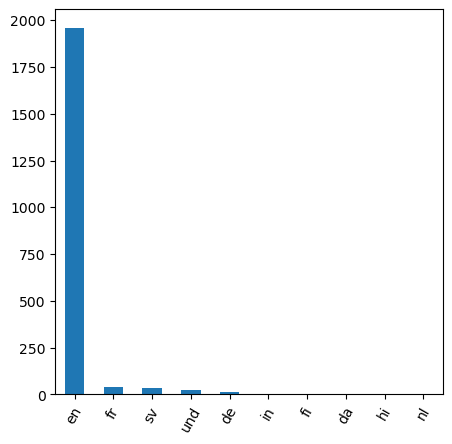

In [14]:
plt.figure(figsize=(5,5))
file['language'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

From here, we can see that even though we just scraped tweets in Engish language, there were some tweets which appeared in French and other languages as well.

In [15]:
print(file.shape)

(2100, 36)


In [16]:
file=file[file['language']=='en']

In [17]:
file.shape

(1960, 36)

So, we filter our data based on language and now we only have english tweets.

In [18]:
file=file.drop_duplicates('tweet')             
#dropping duplicate tweets
file.shape

(1927, 36)

Here, we observe that some tweets have been duplicated. So, we drop them.

In [19]:
len(file['date'].unique())  

22

In [20]:
file.sort_values(by=['date'], ascending=[True]).head(1)

id  conversation_id               created_at       date  \
2099  1.460000e+18     1.460000e+18  2021-11-26 20:19:20 UTC 2021-11-26   

          time  timezone       user_id       username     name  place  ...  \
2099  20:19:20         0  1.240000e+18  anrnhasnoname  a nurse    NaN  ...   

     geo source user_rt_id user_rt retweet_id  \
2099 NaN    NaN        NaN     NaN        NaN   

                                               reply_to  retweet_date  \
2099  [{'screen_name': 'PeacockFlu', 'name': 'Tom Pe...           NaN   

      translate trans_src trans_dest  
2099        NaN       NaN        NaN  

[1 rows x 36 columns]

We have considered 22 number of days as people started tweeting about omicron from 26th November. And we scraped our data by 21st December. So, our dataset contains tweets from these days.

In [21]:
file.drop(columns={'id', 'conversation_id', 'created_at',  'time', 'timezone',
       'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'},inplace=True)

# Cleaning Tweets

In next steps, we try to clean the tweets using neattext package. This is further followed by looking for spelling mistakes, and for better results we used two packages. Here, while cleaning tweets we haven't removed hashtags, as we felt it may be important for analysis. We further remove those words containing less than 3 letters, as there are few chances of it adding any meaning to our results. Further, extra spaces are removed.

In [22]:
file['clean_data']=file['tweet'].str.lower()

In [23]:
file['clean_data']=file['clean_data'].apply(ntx.remove_urls)
file['clean_data']=file['clean_data'].apply(ntx.remove_userhandles)
file['clean_data']=file['clean_data'].apply(ntx.remove_multiple_spaces)
file['clean_data']=file['clean_data'].apply(ntx.remove_special_characters)

# Here, we haven't removed hashtags as it may be important.

In [24]:
from autocorrect import Speller

spell = Speller(lang='en')

# spell check has been applied from 2 libraries just for better confirmation
file['clean_data']= file['clean_data'].apply(spell)

In [25]:
# correct spelling of tweets
from textblob import TextBlob

In [26]:
file['clean_data'] = file['clean_data'].map(lambda x: TextBlob(x).correct().string)
file['clean_data']

0       i partly wish one of these tests would show up...
1        and are they being tested for could given the...
2        new micro symptom that appears when you are a...
3       brow give just been watching micro symptom vid...
4        fever is not even in the top 5 micro symptoms...
                              ...                        
2093    thread on symptom severity seen thus far with ...
2095     excellent sweet phylogenetic analysis suggest...
2097     considering micro is symptomless does that me...
2098    micro no taste and smell is a symptom of the e...
2099     micro it is  thanks again for your insight  c...
Name: clean_data, Length: 1927, dtype: object

In [ ]:
# from google.colab import files
# file.to_csv('file.csv') 
# files.download('file.csv')

In [27]:
# Remove words with less than 3 letters
file['clean_data'] = file['clean_data'].map(lambda text: re.sub(r'\b\w{1,2}\b', '', text))
# since sh word doesn't make any sense

In [28]:
# Remove more than one spaces
file['clean_data'] = file['clean_data'].map(lambda text: re.sub(' {2,}', ' ', text))

Then, we also tried creating slang dictionary by extracting data from "http://www.netlingo.com/acronyms.php" using beautiful soup. But because of it's vastness, rather than simpliying things it was further complicating it, for Ex: bro which 

In [29]:
# Replacing slangs used in the tweet by using slang dictionary

from bs4 import BeautifulSoup
import requests, json
resp = requests.get("http://www.netlingo.com/acronyms.php")
soup = BeautifulSoup(resp.text, "html.parser")
slangdict= {}
key=""
value=""
for div in soup.findAll('div', attrs={'class':'list_box3'}):
    for li in div.findAll('li'):
        for a in li.findAll('a'):
            key =a.text
            value = li.text.split(key)[1]
            slangdict[key]=value


In [30]:
chat_words=slangdict

In [31]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

# Here, we are splitting that word and converting it into upper case to match

In [32]:
file['clean_data'].map(chat_conversion)

0       partly wish one these tests would show positiv...
1       and are they being tested for could given the ...
2       new micro symptom that appears when you are as...
3       brow give just been watching micro symptom vid...
4       fever not even the top micro symptoms the toe ...
                              ...                        
2095    thread symptom severity seen thus far with mic...
2097    excellent sweet phylogenetic analysis suggests...
2099    considering micro symptomless does that mean m...
2100    micro taste and smell symptom the ebook virus ...
2101    micro thanks again for your insight can ask kn...
Name: clean_data, Length: 1929, dtype: object

And when we observe wordcloud, we can easily observe way too much abbreviations has been added (even when it's not required). So, this change hasn't been added to our data. 

Stopwords from tweets are removed, and are customized according to our requirement as we felt that words like "not", "against" may be an important word to differentiate vaccinated and non-vaccinated tweeters.

In [29]:
from nltk.corpus import stopwords

In [30]:
# Customize it according to our need
english_words=['i','me','my','myself','we','our','ours','ourselves', 'you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his',
               'himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this',
               'that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the',
               'and','but','if','or','because','as','until','while','of','at','by','for','with','about','between','into','through','during','before','after',
               'above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how',
               'all','any','both','each','few','more','most','other','some','such','only','own','same', 'so','than','too','very','s','t','can','will','just','don',
               'should',"should've",'now','d','ll','m','o','re','ve','y']


# ,'against'
# 'ain','aren',"aren't",'couldn', "couldn't",
#  'didn',"didn't",'doesn',"doesn't",
#  'hadn',"hadn't",'hasn',"hasn't",'haven',
#  "haven't",'no','nor','not',"don't",'isn',"isn't",'ma','mightn',
#  "mightn't",'mustn',"mustn't",'needn',"needn't",
#  'shan',"shan't",'shouldn',"shouldn't",
#  'wasn',"wasn't",'weren',"weren't",'won',"won't",
#  'wouldn',"wouldn't"

In [31]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in english_words:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [32]:
file['clean_data']= file['clean_data'].map(remove_stopwords)
file['clean_data']

0       partly wish one  tests would show positive giv...
1           tested  could given  strong gastric sympto...
2                    new micro symptom  appears    asleep
3       brow give   watching micro symptom video coutu...
4       fever not even  top micro symptoms  toe sympto...
                              ...                        
2093    thread symptom severity seen thus far  micro w...
2095    excellent sweet phylogenetic analysis suggests...
2097    considering micro symptomless   mean mandatory...
2098    micro taste  smell symptom  ebook virus covidv...
2099    micro thanks    insight  ask know much yet  sy...
Name: clean_data, Length: 1927, dtype: object

In [33]:
file["tweet"][0]

"I partly wish one of these tests would show up as 'positive'.  I've been ill for over a week. Every symptom I have is consistent with Omicron.  Yet, the law says that without a positive test I am still allowed to do whatever I want, go wherever I want, mix with whomever I want."

In [34]:
file["clean_data"][0]

'partly wish one  tests would show positive give  ill   week every symptom  consistent  micro yet  law says  without positive test still allowed whatever want wherever want mix  whomever want'

In [35]:
# Remove more than one spaces
file['clean_data'] = file['clean_data'].map(lambda text: re.sub(' {2,}', ' ', text))

In [36]:
file["clean_data"][0]

'partly wish one tests would show positive give ill week every symptom consistent micro yet law says without positive test still allowed whatever want wherever want mix whomever want'

Here, we observe that while spelling correction omicron word has been converted to micro. This is something that we need to look into further.

In [41]:
file_save=file.copy()

In [42]:
# from google.colab import files
# file.to_csv('data_cleaned_all.csv') 
# files.download('data_cleaned_all.csv')

### Creating Wordclouds

In [40]:
# !pip install wordcloud

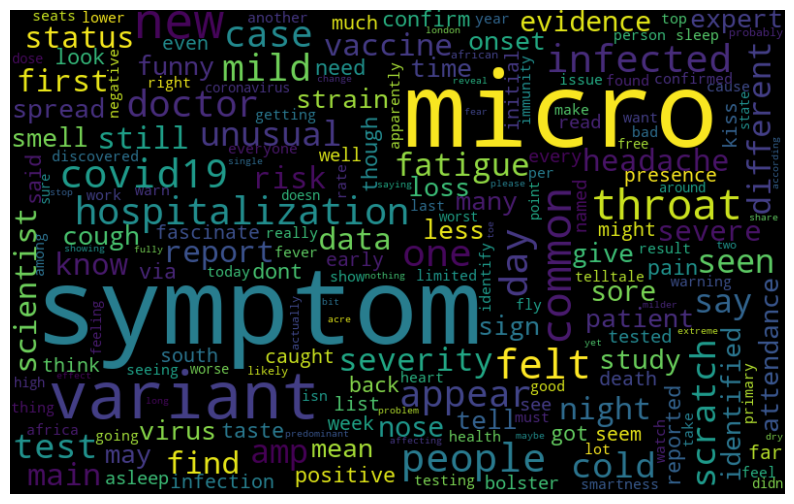

In [39]:
# Create word cloud

all_words = ' '.join([text for text in file['clean_data']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# collocations = False to show unique words

From here, we can see that symptom and omicron(micro) are the most common words here, which should be the case as we have scraped our tweets based on these words. Also, we can observe lot of symptoms present in the tweet.

## Assigning polarity and subjectivity to tweets

We assign polarity to identify the person's sentiment towards vaccination. The assumption is that if a user is found to be with negative sentiment score then he/she is likely to be **not vaccinated**. On the other hand a user with positive sentiment is most likely to be **vaccinated**. Tweets of some users must be **neutral** indicating that their tweets doesn't say anything much about vaccinated or not.

In [41]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
    senti = TextBlob(text)
    senti_polarity = senti.sentiment.polarity
    senti_subjectivity = senti.sentiment.subjectivity

    if senti_polarity > 0:
        res = 'Positive'

    elif senti_polarity < 0:
        res = 'Negative'

    elif senti_polarity == 0:
        res ="Neutral"

    result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

    return result

In [42]:
file['results'] = file['clean_data'].apply(blob_fun)

In [43]:
file.head()

date       user_id         username  \
0 2021-12-20  7.120000e+17    james_youdale   
1 2021-12-20  1.333125e+09  sepfieldpatient   
2 2021-12-20  7.390000e+17        chriscmma   
3 2021-12-20  7.238310e+07          jmad263   
4 2021-12-20  1.420000e+18      thraxus2021   

                                               tweet  replies_count  \
0  I partly wish one of these tests would show up...              0   
1  @AndrewHewat And are they being tested for Cov...              0   
2  ðð New Omicron symptom that appears when...              0   
3  Bro I've just been watching omicron symptom vi...              0   
4  @lakefieldmoscow @Quant48 @BallouxFrancois Fev...              0   

   retweets_count  likes_count  \
0               0            0   
1               0            1   
2               0            0   
3               0            0   
4               0            0   

                                          clean_data  \
0  partly wish one tests would show positive give...   
1   tested could given strong gastric symptom rep...   
2                   new micro symptom appears asleep   
3  brow give watching micro symptom video couture...   
4  fever not even top micro symptoms toe symptom ...   

                                             results  
0  {'polarity': 0.05113636363636364, 'subjectivit...  
1  {'polarity': 0.4333333333333333, 'subjectivity...  
2  {'polarity': 0.13636363636363635, 'subjectivit...  
3  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...  
4  {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...

In [44]:
file=file.drop("tweet",axis=1)

In [45]:
file = file.join(pd.json_normalize(data=file['results']))

In [46]:
file.head()

date       user_id         username  replies_count  retweets_count  \
0 2021-12-20  7.120000e+17    james_youdale              0               0   
1 2021-12-20  1.333125e+09  sepfieldpatient              0               0   
2 2021-12-20  7.390000e+17        chriscmma              0               0   
3 2021-12-20  7.238310e+07          jmad263              0               0   
4 2021-12-20  1.420000e+18      thraxus2021              0               0   

   likes_count                                         clean_data  \
0            0  partly wish one tests would show positive give...   
1            1   tested could given strong gastric symptom rep...   
2            0                   new micro symptom appears asleep   
3            0  brow give watching micro symptom video couture...   
4            0  fever not even top micro symptoms toe symptom ...   

                                             results  polarity  subjectivity  \
0  {'polarity': 0.05113636363636364, 'subjectivit...  0.051136      0.585227   
1  {'polarity': 0.4333333333333333, 'subjectivity...  0.433333      0.733333   
2  {'polarity': 0.13636363636363635, 'subjectivit...  0.136364      0.454545   
3  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...  0.000000      0.000000   
4  {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...  0.500000      0.500000   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3   Neutral  
4  Positive

In [47]:
# categorized tweets in separate Series
positive_tweet =  file[file['sentiment'] == 'Positive']['clean_data']
negative_tweet =  file[file['sentiment'] == 'Negative']['clean_data']
neutral_tweet =  file[file['sentiment'] == 'Neutral']['clean_data']

In [48]:
file['sentiment'].value_counts()

Positive    862
Negative    491
Neutral     414
Name: sentiment, dtype: int64

## Wordclouds for positive , negative and neutral tweets

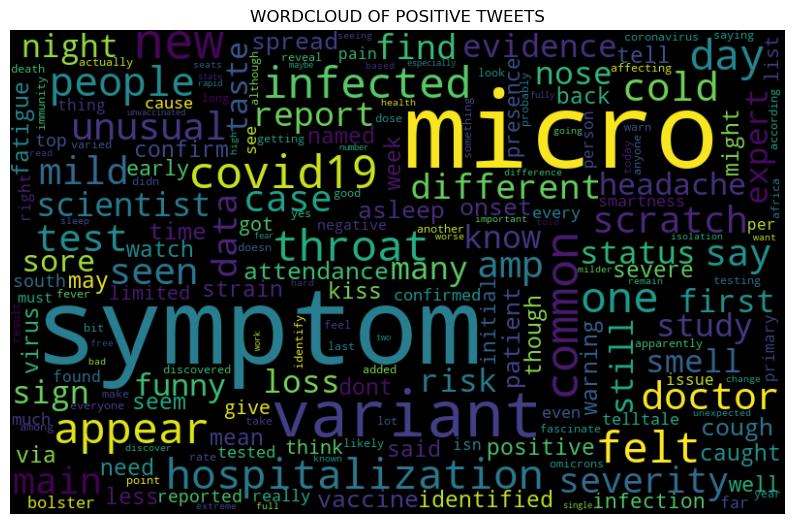

In [49]:
all_words = ' '.join([text for text in positive_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WORDCLOUD OF POSITIVE TWEETS")
plt.show()

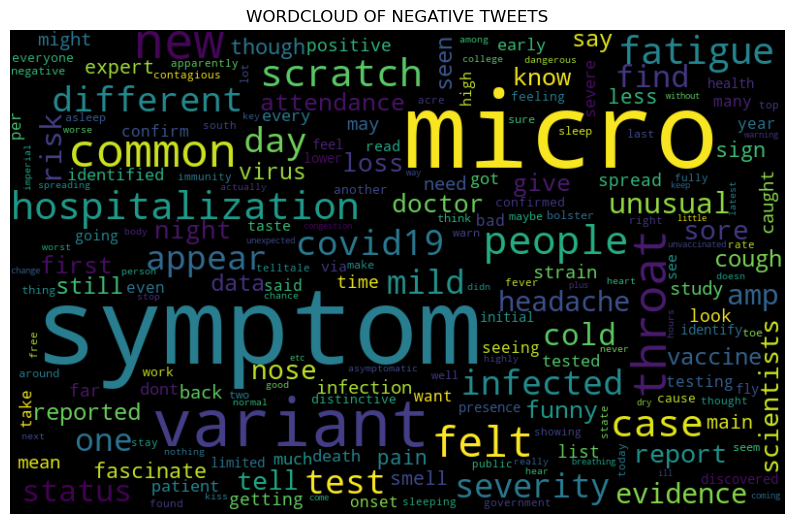

In [50]:
all_words = ' '.join([text for text in negative_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WORDCLOUD OF NEGATIVE TWEETS")
plt.show()

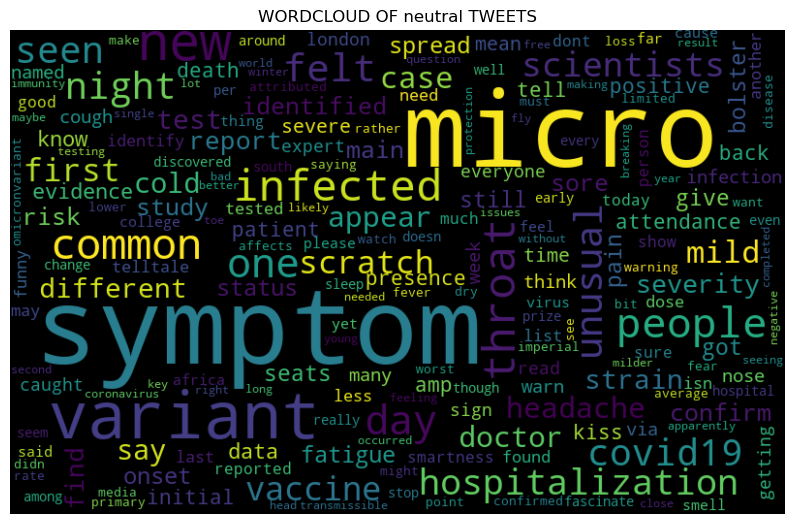

In [51]:
all_words = ' '.join([text for text in neutral_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WORDCLOUD OF neutral TWEETS")
plt.show()

Here, we observe different word clouds based on positive, negative, and neutral tweets.

## Exploratory Data Analysis 

In [52]:
# Breaking down the tweets into words in seperate categories
positive_tokens = [token for line in positive_tweet for token in line.split()]
negative_tokens = [token for line in negative_tweet for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [53]:
from collections import Counter
# to get most used words
def get_maxtoken(tweets,num=30):
    word_tokens = Counter(tweets)
    max_common = word_tokens.most_common(num)
    return dict(max_common)

In [54]:
import plotly.express as px

In [55]:
def token_file_vis(x, title):
    file = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
    # plt.figure(figsize = (20,5))
    # plt.title(title)
    # plt.xticks(rotation=45)
    fig = px.bar(file,x='words',y='count',title = title)
    fig.show()

In [56]:
token_file_vis(positive_tokens,'Positive')
token_file_vis(negative_tokens,'Negative')
token_file_vis(neutral_tokens,'Neutral')

From here, it appears that people who tend to have neutral opinion are the most likely to be vaccinated.

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



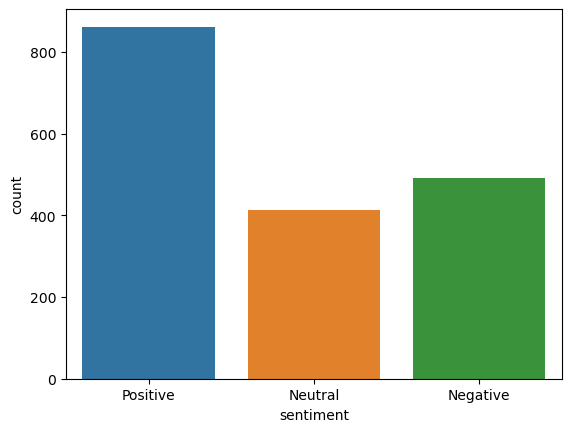

In [57]:
# Displaying target distribution.
import seaborn as sns

sns.countplot(file['sentiment'])

plt.show()

Number of positive tweets are more

In [58]:
file.groupby(['date','sentiment']).size()

date        sentiment
2021-12-02  Negative      15
            Neutral       11
            Positive      16
2021-12-03  Negative       6
            Neutral        3
            Positive      16
2021-12-04  Negative      13
            Neutral        7
            Positive      22
2021-12-08  Negative       3
            Neutral        6
            Positive      11
2021-12-09  Negative       3
            Neutral        3
            Positive       8
2021-12-10  Negative       7
            Neutral       13
            Positive      10
2021-12-11  Negative      18
            Neutral       28
            Positive      52
2021-12-12  Negative      17
            Neutral       43
            Positive      63
2021-12-13  Negative      27
            Neutral       19
            Positive      44
2021-12-14  Negative      24
            Neutral       18
            Positive      58
2021-12-15  Negative      56
            Neutral       39
            Positive      85
2021-12-16  Negative 

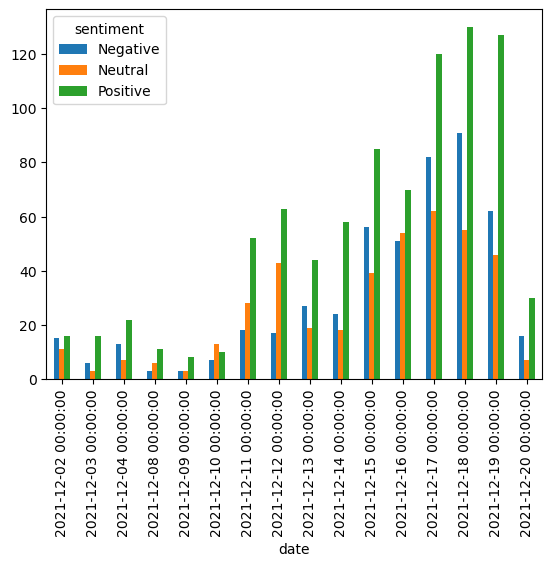

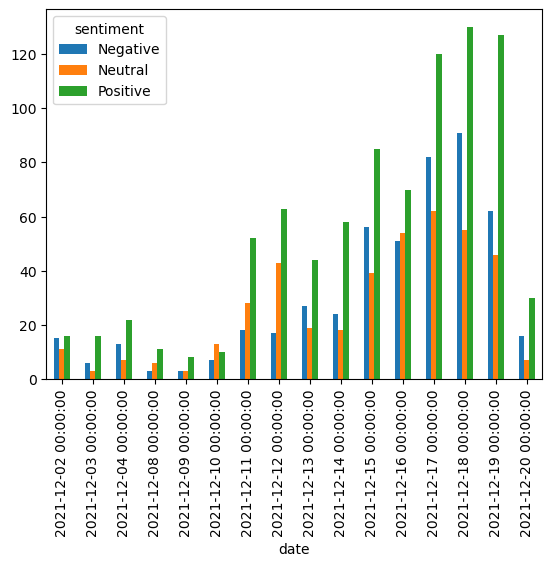

In [68]:
(file
 .groupby(['date', 'sentiment'])
 .size()
 .unstack()
 .plot.bar()
)
plt.show()


More people started getting vaccinated after 10th december. This data is influenced by the number of tweets. This gives us some idea on how people would have started to prefer to get vaccinated after the presence of new variant increased.

In [60]:
import plotly.express as px
total=pd.DataFrame()
total['date'] = sorted(file['date'].unique())
senti=list()
for date in total['date']:
    senti.append(file[file['date']==date].polarity.mean())
total['Sentiment']=senti
fig = px.line(total, x="date", y="Sentiment", title='Overall Sentiment around Vaccines')
fig.show()   

Positive polarity reaches its peak during december 2nd week.

In [61]:
fig = px.scatter(file,x='polarity',y='subjectivity')
fig.show()

In [62]:
def percent(x,y):
    return print("Percentage of "+y+" tweets :",round(len(x)/file.shape[0]*100,3),"%")

In [66]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 44.686 %
Percentage of negative tweets : 25.505 %
Percentage of neutral tweets : 21.514 %


# **Working on tweets**

In [67]:
file=file['clean_data']

In [68]:
file=pd.DataFrame(file)

In [69]:
file_cleaned = file.dropna().drop_duplicates().reset_index(drop=True).rename(columns={'clean_data':'title'})

INFO - 12:06:51: NumExpr defaulting to 2 threads.


In [70]:
file_cleaned.shape

(1575, 1)

In [71]:
file_cleaned.head()

title
0  partly wish one tests would show positive give...
1   tested could given strong gastric symptom rep...
2                   new micro symptom appears asleep
3  brow give watching micro symptom video couture...
4  fever not even top micro symptoms toe symptom ...

#### Feature Extraction:

We tried to find features that could be significant for this prediction, so we created variables like presence of swearwords, total number of words, polarity, subjectivity, and sentiment. Vectorisation will help us to determine the importance of a word in any tweet, and how prediction is affected by it.

#### Hypothesis Testing:

Welch’s Test for Unequal Variances (also called Welch’s t-test, Welch’s adjusted T or unequal
variances t-test) is a modification of Student’s t-test to see if two sample means are significantly
different. It is used to compare the means of two groups of samples when the variances are
different. The null hypothesis for the test is that the means are equal. The alternate hypothesis for the test is that means are not equal. 

Here, we observe that the p-value is 0.63, so we can’t reject the null hypothesis. Thus, we conclude that both distributions have the same mean.


#### Modeling:

Our scraped data is not labelled if the person has been vaccinated or not so there is no sure way to measure it until we do manual labelling for it. This will be a time consuming process and may not be apt considering our current deadline. So, we decided to move forward with unsupervised modeling i.e K-Means Clustering.

The principle behind unsupervised learning is that we don't provide the model any prior assumptions or definitions about the result of the variables we feed it - instead, we just enter the data (which has been preprocessed) and expect the model to learn the structure of the data itself. It's particularly beneficial when we don't have labelled data or aren't sure how the data is structured and want to learn more about the nature of the process we're studying without making any assumptions about the conclusion. The main idea behind this approach is that negative and positive words usually are surrounded by similar words. With such assumption, words could form clusters (based on similarity of their surrounding)

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

We are using the Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences. Here, we will ask our model to find the tweets most similar to our current tweet. And, if we can get an idea of the type of cluster it is, we can classify them into one of the groups they belong to.

From the K-means clustering ,we take into account two clusters, which give us values 0 and 1. We tried to observe sentiments associated with each of the clusters, and we came to the conclusion that 0 can symbolize those people who got vaccinated, and 1 can represent those people who didn’t get vaccinated based on the keywords they used. 

Then we applied logistic regression using all the extracted features to get an approximate idea if results are similar to those of K-Means Clustering. So, predictions from K-Means were used as the target variable in Logistic Regression.

#### Result:

We were able to assign clusters to our tweets, but comparing it with logistic regression doesn’t provide any valuable insights because of the uncertainty of the prediction variable used as target variable.


In [72]:
def text_to_word_list(text, preprocessing_word):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    # text = str(text)
    # text = text.lower()

    # Clean the text
    # text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    # text = sub(r"\+", " plus ", text)
    # text = sub(r",", " ", text)
    # text = sub(r"\.", " ", text)
    # text = sub(r"!", " ! ", text)
    # text = sub(r"\?", " ? ", text)
    # text = sub(r"'", " ", text)
    # text = sub(r":", " : ", text)
    # text = sub(r"\s{2,}", " ", text)

    text = text.split()

    return text  

In [73]:
file_cleaned.title = file_cleaned.title.apply(lambda x: text_to_word_list(x, unidecode))

In [74]:
file_cleaned.head()

title
0  [partly, wish, one, tests, would, show, positi...
1  [tested, could, given, strong, gastric, sympto...
2             [new, micro, symptom, appears, asleep]
3  [brow, give, watching, micro, symptom, video, ...
4  [fever, not, even, top, micro, symptoms, toe, ...

In [75]:
file_model = file_cleaned.copy()
# file_model = file_model[file_model.title.str.len()>1]

In [76]:
file_model.head()

title
0  [partly, wish, one, tests, would, show, positi...
1  [tested, could, given, strong, gastric, sympto...
2             [new, micro, symptom, appears, asleep]
3  [brow, give, watching, micro, symptom, video, ...
4  [fever, not, even, top, micro, symptoms, toe, ...

In [77]:
sent = [row for row in file_model.title]
phrases = Phrases(sent, min_count=2, progress_per=50000)
bigram = Phraser(phrases)
bigram.threshold = 4.0
sentences = bigram[sent]
sentences[1]
# Here, I have tried to change the threshold of bigram for more grouping

INFO - 12:06:51: collecting all words and their counts
INFO - 12:06:51: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:06:51: collected 18184 word types from a corpus of 23115 words (unigram + bigrams) and 1575 sentences
INFO - 12:06:51: using 18184 counts as vocab in Phrases<0 vocab, min_count=2, threshold=10.0, max_vocab_size=40000000>
INFO - 12:06:51: source_vocab length 18184
INFO - 12:06:51: Phraser built with 391 phrasegrams


['tested',
 'could',
 'given',
 'strong',
 'gastric',
 'symptom',
 'reports',
 'micro']

In [78]:
file_model.title[1]

['tested',
 'could',
 'given',
 'strong',
 'gastric',
 'symptom',
 'reports',
 'micro']

In [79]:
sentences

- min count = 3 - remove most unusual words from training embeddings, like words 'ssssuuuuuuuppppppeeeeeerrrr', which actually stands for 'super', and doesn't need additional training
- window = 4 - Word2Vec model will learn to predict given word from up to 4 words to the left, and up to 4 words to the right
- size = 300 - size of hidden layer used to predict surroundings of embedded word, which also stands for dimensions of trained embeddings
- sample = 1e-5 - probability baseline for subsampling most frequent words from surrounding of embedded word
- negative = 20 - number of negative (ones that shouldn't have been predicted while modeling selected pair of words) words that will have their corresponding weights updated while training on specific training example, along with positive word 

In [80]:
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

start = time()

w2v_model.build_vocab(sentences, progress_per=50000)

print('Time to build vocab: {} mins'.format(round((time() - start) / 60, 2)))

INFO - 12:06:51: collecting all words and their counts
INFO - 12:06:51: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:06:51: collected 4252 word types from a corpus of 20906 raw words and 1575 sentences
INFO - 12:06:51: Loading a fresh vocabulary
INFO - 12:06:51: effective_min_count=3 retains 1435 unique words (33% of original 4252, drops 2817)
INFO - 12:06:51: effective_min_count=3 leaves 17446 word corpus (83% of original 20906, drops 3460)
INFO - 12:06:51: deleting the raw counts dictionary of 4252 items
INFO - 12:06:51: sample=1e-05 downsamples 1435 most-common words
INFO - 12:06:51: downsampling leaves estimated 1935 word corpus (11.1% of prior 17446)
INFO - 12:06:51: estimated required memory for 1435 words and 300 dimensions: 4161500 bytes
INFO - 12:06:51: resetting layer weights


Time to build vocab: 0.01 mins


In [ ]:
start = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - start) / 60, 2)))

w2v_model.init_sims(replace=True)

In [82]:
w2v_model.save("word2vec.model")

INFO - 12:06:55: saving Word2Vec object under word2vec.model, separately None
INFO - 12:06:55: not storing attribute vectors_norm
INFO - 12:06:55: not storing attribute cum_table
INFO - 12:06:55: saved word2vec.model


Exporting preprocessed dataset for further steps (with replaced bigrams)

In [ ]:
file_export = file_model.copy()
file_export['old_title'] = file_export.title
file_export.old_title = file_export.old_title.str.join(' ')
file_export.title = file_export.title.apply(lambda x: ' '.join(bigram[x]))


In [84]:
file_export[['title']].to_csv('cleaned_dataset.csv', index=False)

### K-Means Clustering

In [87]:
word_vectors = Word2Vec.load("/content/drive/MyDrive/Twitter project/word2vec.model").wv

INFO - 12:23:23: loading Word2Vec object from /content/drive/MyDrive/Twitter project/word2vec.model
INFO - 12:23:24: loading wv recursively from /content/drive/MyDrive/Twitter project/word2vec.model.wv.* with mmap=None
INFO - 12:23:24: setting ignored attribute vectors_norm to None
INFO - 12:23:24: loading vocabulary recursively from /content/drive/MyDrive/Twitter project/word2vec.model.vocabulary.* with mmap=None
INFO - 12:23:24: loading trainables recursively from /content/drive/MyDrive/Twitter project/word2vec.model.trainables.* with mmap=None
INFO - 12:23:24: setting ignored attribute cum_table to None
INFO - 12:23:24: loaded /content/drive/MyDrive/Twitter project/word2vec.model


In [88]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [89]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None)

INFO - 12:23:33: precomputing L2-norms of word weight vectors


[('varied', 0.9999833106994629),
 ('all', 0.9999828338623047),
 ('at', 0.9999823570251465),
 ('bar', 0.9999822974205017),
 ('these', 0.9999822378158569),
 ('rather', 0.9999821186065674),
 ('an', 0.9999816417694092),
 ('hospitalization', 0.9999815821647644),
 ('take', 0.9999815821647644),
 ('fall', 0.9999814033508301)]

In [90]:
positive_cluster_index = 1
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [91]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [92]:
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [93]:
final_file = pd.read_csv('/content/drive/MyDrive/Twitter project/cleaned_dataset.csv')

In [94]:
sentiment_map = pd.read_csv('/content/drive/MyDrive/Twitter project/sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

Getting tfidf scores of words in every sentence, and replacing them with their associated tfidf weights:

In [95]:
file_weighting = final_file.copy()

In [96]:
file_weighting.head()

title
0  i partly wish one of these tests would show up...
1  and are they being tested for could given the ...
2  new micro symptom that_appears when_you are_as...
3  brow give just been watching micro symptom vid...
4  fever is not even in the top_5 micro symptoms ...

In [97]:
file_weighting.title=file_weighting.title.values.astype('U')

In [130]:
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting.title)
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(file_weighting.title)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Replacing words in sentences with their tfidf scores

In [102]:
def create_tfidf_dictionary(x, transformed_file, features):
    '''
    create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    inspired  by function from this wonderful article: 
    https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
    
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer

    '''
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    '''
    replacing each word with it's calculated tfidf dictionary with scores of each word
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    '''
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.title.split()))

In [103]:
%%time
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)#this step takes around 3-4 minutes minutes to calculate

CPU times: user 588 ms, sys: 9.94 ms, total: 598 ms
Wall time: 602 ms


Replacing words in sentences with their sentiment score

In [104]:
def replace_sentiment_words(word, sentiment_dict):
    '''
    replacing each word with its associated sentiment score from sentiment dict
    '''
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [105]:
replaced_closeness_scores = file_weighting.title.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

Merging both previous steps and getting the predictions:

In [106]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.title]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['predict__y'] = (replacement_df.sentiment_rate>0).astype('int8')
# replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.sentiment]

In [107]:
df_predict=replacement_df[['sentence','predict__y']]

In [108]:
df_predict.head()

sentence  predict__y
0  i partly wish one of these tests would show up...           1
1  and are they being tested for could given the ...           0
2  new micro symptom that_appears when_you are_as...           0
3  brow give just been watching micro symptom vid...           1
4  fever is not even in the top_5 micro symptoms ...           0

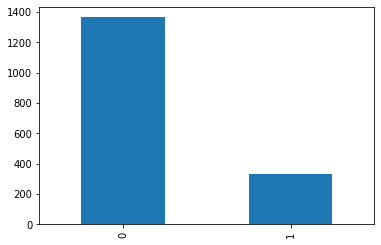

In [109]:
df_predict['predict__y'].value_counts().plot.bar()

Most tweets falls under 0th prediction class

### Assigning polarity and subjectivity

We assign polarity to identify the person's sentiment towards vaccination. The assumption is that if a user is found to be with negative sentiment score then he/she is likely to be **not vaccinated**. On the other hand a user with positive sentiment is most likely to be **vaccinated**. Tweets of some users must be **neutral** indicating that their tweets doesn't say anything much about vaccinated or not.

In [110]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
    senti = TextBlob(text)
    senti_polarity = senti.sentiment.polarity
    senti_subjectivity = senti.sentiment.subjectivity

    if senti_polarity > 0:
        res = 'Positive'

    elif senti_polarity < 0:
        res = 'Negative'

    elif senti_polarity == 0:
        res ="Neutral"

    result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

    return result

In [111]:
df_predict['results'] = df_predict['sentence'].apply(blob_fun)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
df_predict = df_predict.join(pd.json_normalize(data=df_predict['results']))

In [113]:
df_predict.tail()

sentence  ...  sentiment
1694  excellent sweet phylogenetic analysis suggests...  ...   Positive
1695  had du set non so his indication fr micro so t...  ...    Neutral
1696  considering micro is symptomless does that mea...  ...   Negative
1697  micro no taste_and smell is a symptom of the e...  ...    Neutral
1698  micro it is thanks again for your insight can ...  ...   Positive

[5 rows x 6 columns]

In [114]:
# categorized tweets in seperate Series
positive_tweet =  df_predict[df_predict['sentiment'] == 'Positive']['sentence']
negative_tweet =  df_predict[df_predict['sentiment'] == 'Negative']['sentence']
neutral_tweet =  df_predict[df_predict['sentiment'] == 'Neutral']['sentence']

### Feature Engineering

#### Swear words


We are trying to evaluate the presene of swear words as negative tweets are likely to contain swear words than the positive ones.

In [115]:
def swearWord(text):
    feature3=False
    Swearwords =["shit","fuck","fucked","fucking","damn","damned","bitch","crap","piss","dick","darn",
                 "cock","pussy","asshole","fag","bastard","slut","douche",
                 "bloody","cunt","bugger","bollocks","arsehole","f***"]
    for item in Swearwords:
        if item in text:
            feature3=True
    return feature3

In [116]:
df_predict["SwearWord"]=df_predict['sentence'].apply(swearWord)

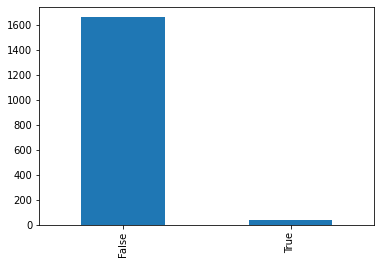

In [117]:
df_predict['SwearWord'].value_counts().plot.bar()

Apparently very few tweets contain swear words in it.

#### Word Count

Extracting the total no. of words in a tweet to see the length of tweets users prefer.

In [118]:
def tot_words(text):
    return(len(text.split()))

In [119]:
df_predict["Word count"]=df_predict['sentence'].apply(tot_words)

In [120]:
df_predict.head()

sentence  ...  Word count
0  i partly wish one of these tests would show up...  ...          46
1  and are they being tested for could given the ...  ...          15
2  new micro symptom that_appears when_you are_as...  ...           6
3  brow give just been watching micro symptom vid...  ...          17
4  fever is not even in the top_5 micro symptoms ...  ...          18

[5 rows x 8 columns]

## Hypothesis Testing: Prediction==1 v/s Prediction==0

Most of the tweets falls in the 0th category(more than 80%). We are trying to see how these classes relate to each other in terms of their polarity scores.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f035b694bd0>]],
      dtype=object)

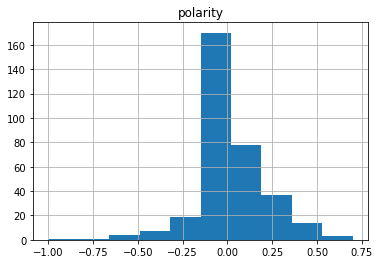

In [121]:
df_predict[df_predict.predict__y== 1].hist('polarity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f035b8f8750>]],
      dtype=object)

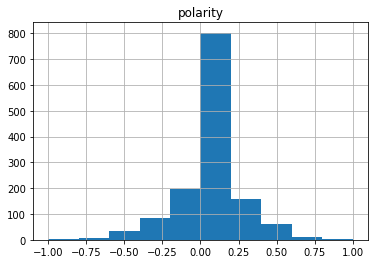

In [122]:
df_predict[df_predict.predict__y== 0].hist('polarity')

Polarity for 1st class appears to be more positive with the distribution i.e more heavily-weighted to the right. 

Avg polarity for 1st prediction - 0.042                                            
Avg polarity for 0th prediction - 0.048

Mean for each prediction is kinda same.

In [123]:
np.mean(df_predict[df_predict.predict__y == 1]['polarity'])

0.04204299902802897

In [124]:
np.mean(df_predict[df_predict.predict__y == 0]['polarity'])

0.04821294276783559

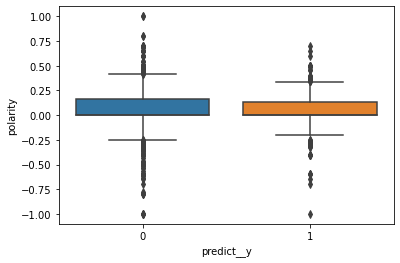

In [125]:
sns.boxplot(x=df_predict['predict__y'],y=df_predict['polarity'])

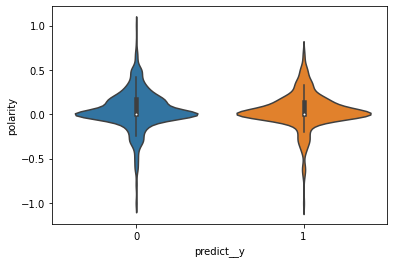

In [126]:
sns.violinplot(x=df_predict['predict__y'],y=df_predict['polarity'])

In [127]:
np.std(df_predict[df_predict.predict__y == 1]['polarity'])

0.1968975309856255

In [128]:
np.std(df_predict[df_predict.predict__y == 0]['polarity'])

0.21911181895578835

Standard deviation of polarity for 1st prediction - 0.196                        
Standard deviation of polarity for 0th prediction - 0.219

Let us check whether the means of both distribution is same or not. From the graphs and statistics above it is seen that they are equal. So we'll use  **Welch’s t test** or **Unequal Variance test** to compare the means of both classes.

**Welch’s Test** for Unequal Variances (also called Welch’s t-test, Welch’s adjusted T or unequal variances t-test) is a modification of Student’s t-test to see if two sample means are significantly different. It is used to compare the means of two groups of samples when the variances are different.

The null hypothesis for the test is that the means are equal.
The alternate hypothesis for the test is that means are not equal.

Welch’s t-test, unlike Student’s t-test, does not have the assumption of equal variance (however, both tests have the assumption of normality). From the above statistics it is clear that variance of both classes are different. 

In [132]:
stats.ttest_ind(df_predict[df_predict.predict__y == 1]['polarity'],
                df_predict[df_predict.predict__y == 0]['polarity'],
                equal_var=False)

Ttest_indResult(statistic=-0.5010748028948826, pvalue=0.6165180617163775)

p-value = 0.63 indicates that we *cannot reject the null hypothesis*. Thus both distributions have same mean.

### Vectorisation

**Vectorization** is the process of converting text to numerical entries in a matrix form. In the count vectorization technique, a document term matrix is generated where each cell is the count corresponding to the tweet indicating the number of times a word appears in a tweet, also known as the term frequency. The document term matrix is a set of dummy variables that indicates if a particular word appears in the document. A column is dedicated to each word in the corpus. 

In [133]:
count_vectorize = CountVectorizer() 
vectorized = count_vectorize.fit_transform(df_predict['sentence'])

In [134]:
df1 = pd.DataFrame(vectorized.toarray(), columns=count_vectorize.get_feature_names())
df1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



(1699, 5193)

In [135]:
frames=[df_predict,df1]
result=pd.concat(frames,axis=1)
result.shape

(1699, 5201)

In [136]:
result.drop(columns={"sentence","results"},inplace=True)

In [137]:
result.head()

predict__y  polarity  subjectivity sentiment  ...  yyyy  zero  zu  zum
0           1 -0.136364      0.772727  Negative  ...     0     0   0    0
1           0  0.433333      0.733333  Positive  ...     0     0   0    0
2           0  0.136364      0.454545  Positive  ...     0     0   0    0
3           1  0.000000      0.000000   Neutral  ...     0     0   0    0
4           0  0.000000      0.000000   Neutral  ...     0     0   0    0

[5 rows x 5197 columns]

In [141]:
#Encoding the object variables
le=pre.LabelEncoder()

In [142]:
for x in result.select_dtypes(include='object').columns:
    result[x]=le.fit_transform(result[x])

In [143]:
features,outcomes=result.drop('predict__y',axis=1),result['predict__y']

In [144]:
x_train,x_test,y_train,y_test=ms.train_test_split(features,outcomes,test_size=0.3,random_state=12356)

In [145]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1189, 5196), (510, 5196), (1189,), (510,))

### Logistic Regression

In [146]:
Logistics_1=glm.LogisticRegression(n_jobs=-1,max_iter=600)

In [147]:
Logistics_1.fit(x_train,y_train)

LogisticRegression(max_iter=600, n_jobs=-1)

In [148]:
Logistics_1.score(x_train,y_train)

0.9857022708158116

In [149]:
Logistics_1.score(x_test,y_test)

0.8725490196078431

In [150]:
mt.confusion_matrix(y_test,Logistics_1.predict(x_test))

array([[400,   7],
       [ 58,  45]])

In [151]:
print(mt.classification_report(y_test,Logistics_1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       407
           1       0.87      0.44      0.58       103

    accuracy                           0.87       510
   macro avg       0.87      0.71      0.75       510
weighted avg       0.87      0.87      0.86       510



#### Conclusion

K-Means clustering gives good approximation of people being vaccinated or not based on their tweets.

#### Discussion

There is a lot of future work, which includes hyperparameter tuning of word2vec model, creating three clusters instead of two, creating a customised dictionary for slangs, changing threshold of bigram to form more number of bigrams. Further, we would like to partially label our data and apply modeling.

#### Key learnings

We learnt how changing keywords while scraping data can have a significant impact on our modeling and how important it is. Next, we learnt to observe patterns from EDA of twitter dataset, where we could easily find the first tweet on omicron and further filter it based on location. Working with unlabelled data taught us how by combining different models we can understand our data better and there is a lot more which can be covered. Most importantly, we learnt to analyse how people’s sentiment can be visible through their tweets and how we can use it to solve bigger problems. This also gave us an idea of how people who are vaccinated and not vaccinated react to same situation differently.

#### References:

https://www.researchgate.net/publication/291153115_Using_Word2Vec_to_process_big_text_data
https://www.researchgate.net/publication/311755864_The_effect_of_preprocessing_techniques_on_Twitter_sentiment_analysis
https://www.researchgate.net/publication/339980709_Sentiment_Analysis_with_NLP_on_Twitter_Data/link/60aa2f96299bf1031fc1d0b8/download
https://www.researchgate.net/publication/341500307_Twitter_Sentiment_Analysis_on_Worldwide_COVID-19_Outbreaks
https://www.researchgate.net/publication/348813187_Web_Scraping_versus_Twitter_API_A_Comparison_for_a_Credibility_Analysis
https://london.ac.uk/sites/default/files/study-guides/introduction-to-natural-language-processing.pdf
https://mdl.library.utoronto.ca/technology/tutorials/scraping-tweets-using-python
https://realpython.com/nltk-nlp-python/
https://www.datacamp.com/community/tutorials/wordcloud-python
https://radimrehurek.com/gensim/models/phrases.html
https://www.kaggle.com/pierremegret/gensim-word2vec-tutorialhttps://medium.com/@erika.dauria/scraping-tweets-off-twitter-with-twint-a7e9d78415bf
https://nealcaren.org/lessons/twint/
https://medium.datadriveninvestor.com/scrape-twitter-without-limits-using-twint-92509f2503cd
https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483
https://medium.com/@feraguilari/hypothesis-testing-welchs-t-test-for-difference-in-means-475e65f2aadb 
https://towardsdatascience.com/nlp-in-python-vectorizing-a2b4fc1a339e 
